<img src="https://github.com/ranjan-p/Machine_Learning_Excercises/blob/master/ML_Images/weather_forecast.jpg?raw=true" width="1100" height="100" />

# Predictive Modeling - Linear Regression on Weather Information Dataset

## Table of Contents

1. [Problem Statement](#section1)<br>
2. [Data Loading and Description](#section2)<br>
3. [Data Preparation & Feature Engineering](#section3)<br>
    - 3.1 [Understanding the Dataset](#section31)<br/>
    - 3.2 [Pre Processing Profiling](#section32)<br/>
    - 3.3 [Data Preparation](#section33)<br/>
    - 3.4 [Post Processing Profiling](#section34)<br/><br>   
4. [Predictive Modeling](#section4)
    - 4.1 [Linear Regression model without GridSearchCV](#section41)<br/>
    - 4.2 [Linear Regression model with GridSearchCV](#section42)<br/><br>
5. [Conclusions](#section5)<br/>  

<a id=section1></a>
## 1. Problem Statement

Based on the weather data in the __Summary of Weather__ dataset, develop a predictive model to determine the Maximum Temperature on a given day. 

In this notebook, we will explore the basic use of Pandas and will cover the basic commands of Exploratory Data Analysis(EDA) which includes cleaning, munging, combining, reshaping, slicing, dicing, and transforming data for analysis purpose. We will alos develop a regression model to predict the Maximum Temperature.

__Exploratory Data Analysis__ 

Understand the data by EDA and derive simple models with Pandas as baseline. EDA ia a critical and first step in analyzing the data and we do this for below reasons :
- Finding patterns in Data
- Determining relationships in Data
- Checking of assumptions
- Preliminary selection of appropriate models
- Detection of mistakes

<a id=section2></a>
## 2. Data Loading & Description

The dataset contains information on weather conditions recorded on each day at various weather stations around the world. Information includes precipitation, snowfall, temperatures, wind speed and whether the day included thunder storms or other poor weather conditions.

Variables included in the dataset are as follows,

| Column Name         | Description                                                                                         | 
| --------------------|-----------------------------------------------------------------------------------------------------| 
| STA                 | Weather Station                                                                                     | 
| Date                | Date of the observation                                                                             |
| Precip              | Precipitation in mm                                                                                 | 
| WindGustSpd         | Peak wind gust speed in km/h                                                                        |
| MaxTemp             | Maximum -  temperature in degrees Celsius                                                           |
| MinTemp             | Minimum - temperature in degrees Celsius                                                            | 
| MeanTemp            | Mean - temperature in degrees Celsius                                                               |  
| Snowfall            | Snowfall and Ice Pellets in mm                                                                      | 
| PoorWeather         | A repeat of the TSHDSBRSGF column                                                                   |   
| YR                  | Year of Observation                                                                                 |
| MO                  | Month of Observation                                                                                |
| DA                  | Day of Observation                                                                                  |
| PRCP                | Precipitation in Inches and Hundredths                                                              |
| DR                  | Peak wind gust direction in tens of degrees                                                         |
| SPD                 | Peak wind gust speed in knots                                                                       |
| MAX                 | Maximum temperature in degrees Fahrenheit                                                           |
| MIN                 | Minimum temperature in degrees Fahrenheit                                                           |
| MEA                 | Mean temperature in degrees Fahrenheit                                                              |
| SNF                 | Snowfall in inches and tenths                                                                       |
| SND                 | Snow depth (includes ice pellets) recorded at 1200 GMT except 0000 GMT in Far East Asian Area in -  |   |                     | inches and tenths                                                                                   |
| FT                  | Frozen Ground Top (depth in inches)                                                                 |
| FB                  | Frozen Ground Base (depth in inches)                                                                |
| FTI                 | Frozen Ground Thickness (thickness in inches)                                                       |
| ITH                 | Ice Thickness on Water (inches and tenths)                                                          |
| PGT                 | Peak wind gust time (hours and tenths)                                                              |
| TSHDSBRSGF          | Day with: Thunder; Sleet; Hail; Dust or Sand; Smoke or Haze; Blowing Snow; Rain; Snow; Glaze;       |  
|                     | Fog; 0 = No, 1 =  Yes                                                                               | 
| SD3                 | Snow depth at 0030 GMT includes ice pellets in inches and tenths                                    |
| RHX                 | 24-hour maximum relative humidity, as a whole percent                                               |
| RHN                 | 24-hour minimum relative humidity, as a whole percent                                               |
| RVG                 | River guage in feet and tenths                                                                      | 
| WTE                 | Water equivalent of snow and ice on ground in inches and hundredths                                 |

In [0]:
import numpy as np                 # Python library to add support for large, multi-dimensional arrays and matrices, 
                                   # along with a large collection of high-level mathematical functions to operate on 
                                   # these arrays. 

import pandas as pd                # Pandas is a software library written for the Python programming language for data
                                   # manipulation and analysis. In particular, it offers data structures and operations 
                                   # for manipulating numerical tables and time series

import pandas_profiling as pp      # Python module that helps in automating the first-level of EDA. Data profiling is 
                                   # about summarizing your dataset through descriptive statistics. 

import matplotlib.pyplot as plt    # Plotting library for Python programming language and it's numerical mathematics
                                   # extension NumPy

import seaborn as sns              # Provides a high level interface for drawing attractive and informative statistical
                                   # graphics

# %matplotlib inline sets the backend of matplotlib to the inline backend. With this backend, the output of plotting
# commands is displayed inline within frontends like the Jupyter notebook, directly below the code cell that produced it.

%matplotlib inline

sns.set()                          # Set aesthetic parameters for seaborn graphs in one step.

from sklearn import metrics

import warnings
warnings.filterwarnings("ignore")  # Discard or ignore warnings, if any.
plt.style.use('fivethirtyeight')

### Importing the Summary of Weather Dataset

In [0]:
data=pd.read_csv("https://raw.githubusercontent.com/insaid2018/Term-2/master/Projects/Summary%20of%20Weather.csv")

<a id=section3></a>
## 3. Data Preparation & Feature Engineering

- In the upcoming sections we will first __understand our dataset__ using various pandas functionalities.
- Then with the help of __pandas profiling__ we will find which columns of our dataset need preprocessing.
- In __preprocessing__ we will analyze the data and add / remove / modify features to understand the data better. 
- Again we will do __pandas profiling__ to see how preprocessing have transformed our dataset.
- We will develop a regression model to predict the Maximum Temperature on a given day.

Whenever we are given a dataset with features, it is not necessary that all the features will be important. There maybe be many redundant features which should be eliminated. Also we can get or add new features by observing or extracting information from other features.

<a id=section31></a>
### 3.1 Understanding the Dataset

To gain insights from data we must look into each aspect of it very carefully. We will start with observing few rows and columns of data both from the starting and from the end.

In [0]:
data.head(5)

,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,MO,DA,PRCP,DR,SPD,MAX,MIN,MEA,SNF,SND,FT,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE
0,10001,1942-7-1,1.016,NaN,25.555556,22.222222,23.888889,0,NaN,42,7,1,0.04,NaN,NaN,78.0,72.0,75.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10001,1942-7-2,0,NaN,28.888889,21.666667,25.555556,0,NaN,42,7,2,0,NaN,NaN,84.0,71.0,78.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10001,1942-7-3,2.54,NaN,26.111111,22.222222,24.444444,0,NaN,42,7,3,0.1,NaN,NaN,79.0,72.0,76.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10001,1942-7-4,2.54,NaN,26.666667,22.222222,24.444444,0,NaN,42,7,4,0.1,NaN,NaN,80.0,72.0,76.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10001,1942-7-5,0,NaN,26.666667,21.666667,24.444444,0,NaN,42,7,5,0,NaN,NaN,80.0,71.0,76.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
data.shape

(119040, 31)

In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119040 entries, 0 to 119039
Data columns (total 31 columns):
STA            119040 non-null int64
Date           119040 non-null object
Precip         119040 non-null object
WindGustSpd    532 non-null float64
MaxTemp        119040 non-null float64
MinTemp        119040 non-null float64
MeanTemp       119040 non-null float64
Snowfall       117877 non-null object
PoorWeather    34237 non-null object
YR             119040 non-null int64
MO             119040 non-null int64
DA             119040 non-null int64
PRCP           117108 non-null object
DR             533 non-null float64
SPD            532 non-null float64
MAX            118566 non-null float64
MIN            118572 non-null float64
MEA            118542 non-null float64
SNF            117877 non-null object
SND            5563 non-null float64
FT             0 non-null float64
FB             0 non-null float64
FTI            0 non-null float64
ITH            0 non-null float64

In [0]:
data.isnull().sum() #checking for total null values

STA                 0
Date                0
Precip              0
WindGustSpd    118508
MaxTemp             0
MinTemp             0
MeanTemp            0
Snowfall         1163
PoorWeather     84803
YR                  0
MO                  0
DA                  0
PRCP             1932
DR             118507
SPD            118508
MAX               474
MIN               468
MEA               498
SNF              1163
SND            113477
FT             119040
FB             119040
FTI            119040
ITH            119040
PGT            118515
TSHDSBRSGF      84803
SD3            119040
RHX            119040
RHN            119040
RVG            119040
WTE            119040
dtype: int64

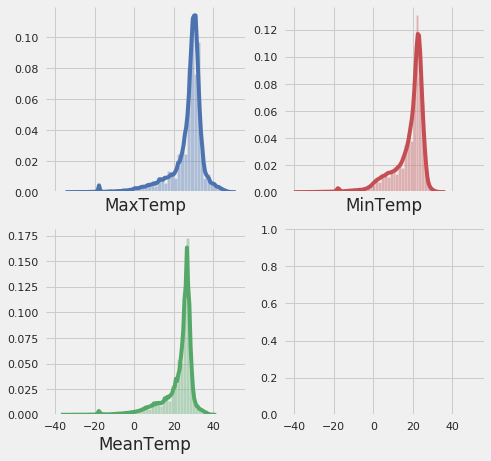

In [0]:
f, axes = plt.subplots(2, 2, figsize=(7, 7), sharex=True)                                      # Set up the matplotlib figure
sns.despine(left=True)

sns.distplot(data.MaxTemp, color="b", ax=axes[0, 0])
sns.distplot(data.MinTemp, color="r", ax=axes[0, 1])
sns.distplot(data.MeanTemp, color="g", ax=axes[1, 0])

In [0]:
data.describe()

,STA,WindGustSpd,MaxTemp,MinTemp,MeanTemp,YR,MO,DA,DR,SPD,MAX,MIN,MEA,SND,FT,FB,FTI,ITH,PGT,SD3,RHX,RHN,RVG,WTE
count,119040.000000,532.000000,119040.000000,119040.000000,119040.000000,119040.000000,119040.000000,119040.000000,533.000000,532.000000,118566.000000,118572.000000,118542.000000,5563.0,0.0,0.0,0.0,0.0,525.000000,0.0,0.0,0.0,0.0,0.0
mean,29659.435795,37.774534,27.045111,17.789511,22.411631,43.805284,6.726016,15.797530,26.998124,20.396617,81.003745,64.273808,72.644843,0.0,NaN,NaN,NaN,NaN,12.085333,NaN,NaN,NaN,NaN,NaN
std,20953.209402,10.297808,8.717817,8.334572,8.297982,1.136718,3.425561,8.794541,15.221732,5.560371,14.869361,14.481498,14.211082,0.0,NaN,NaN,NaN,NaN,5.731328,NaN,NaN,NaN,NaN,NaN
min,10001.000000,18.520000,-33.333333,-38.333333,-35.555556,40.000000,1.000000,1.000000,2.000000,10.000000,-28.000000,-37.000000,-32.000000,0.0,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
25%,11801.000000,29.632000,25.555556,15.000000,20.555556,43.000000,4.000000,8.000000,11.000000,16.000000,78.000000,59.000000,69.000000,0.0,NaN,NaN,NaN,NaN,8.500000,NaN,NaN,NaN,NaN,NaN
50%,22508.000000,37.040000,29.444444,21.111111,25.555556,44.000000,7.000000,16.000000,32.000000,20.000000,85.000000,70.000000,78.000000,0.0,NaN,NaN,NaN,NaN,11.600000,NaN,NaN,NaN,NaN,NaN
75%,33501.000000,43.059000,31.666667,23.333333,27.222222,45.000000,10.000000,23.000000,34.000000,23.250000,89.000000,74.000000,81.000000,0.0,NaN,NaN,NaN,NaN,15.000000,NaN,NaN,NaN,NaN,NaN
max,82506.000000,75.932000,50.000000,34.444444,40.000000,45.000000,12.000000,31.000000,78.000000,41.000000,122.000000,94.000000,104.000000,0.0,NaN,NaN,NaN,NaN,23.900000,NaN,NaN,NaN,NaN,NaN


#### Observations

1. The dataset has __31__ coulumns.
2. The data has a total of __119040__ rows.
3. The dataset has __Integer, Float & Object__ data types.
4. There are several columns with __Null__ data.
5. The dataset contains data for the years __1940__ to __1945__.
6. Maximum Temperature range from __27__ to __50 degree Celcius__. 
7. Maximum Temperature range from __17__ to __34 degree Celcius__. 

<a id=section32></a>
### 3.2 Pre Processing Profiling

- By pandas profiling, an __interactive HTML report__ gets generated which contins all the information about the columns of the dataset, like the __counts and type__ of each _column_. Detailed information about each column, __coorelation between different columns__ and a sample of dataset.<br/>
- It gives us __visual interpretation__ of each column in the data.
- _Spread of the data_ can be better understood by the distribution plot. 
- _Granular level_ analysis of each column.

In [0]:
data_profile = pp.ProfileReport(data)
data_profile.to_file(outputfile="weather_data_before_preprocessing.html")
pp.ProfileReport(data)

Number of variables,31
Number of observations,119040
Total Missing (%),0.0%
Total size in memory,28.2 MiB
Average record size in memory,248.0 B
Numeric,9
Categorical,3
Boolean,1
Date,0
Text (Unique),0
Rejected,14


Here, we have done Pandas Profiling before preprocessing our dataset, so we have named the html file as __weather_data_before_preprocessing.html__. Take a look at the file and see what useful insight you can develop from it. Now we will process our data to better understand it.

<a id=section33></a>
### 3.3 Data Preparation

In [0]:
data.duplicated().sum()

10

In [0]:
data_mod = data.drop_duplicates()
data_mod.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119030 entries, 0 to 119039
Data columns (total 31 columns):
STA            119030 non-null int64
Date           119030 non-null object
Precip         119030 non-null object
WindGustSpd    532 non-null float64
MaxTemp        119030 non-null float64
MinTemp        119030 non-null float64
MeanTemp       119030 non-null float64
Snowfall       117867 non-null object
PoorWeather    34233 non-null object
YR             119030 non-null int64
MO             119030 non-null int64
DA             119030 non-null int64
PRCP           117098 non-null object
DR             533 non-null float64
SPD            532 non-null float64
MAX            118556 non-null float64
MIN            118562 non-null float64
MEA            118532 non-null float64
SNF            117867 non-null object
SND            5563 non-null float64
FT             0 non-null float64
FB             0 non-null float64
FTI            0 non-null float64
ITH            0 non-null float64

In [0]:
data_mod.isnull().sum() #checking for total null values

STA                 0
Date                0
Precip              0
WindGustSpd    118498
MaxTemp             0
MinTemp             0
MeanTemp            0
Snowfall         1163
PoorWeather     84797
YR                  0
MO                  0
DA                  0
PRCP             1932
DR             118497
SPD            118498
MAX               474
MIN               468
MEA               498
SNF              1163
SND            113467
FT             119030
FB             119030
FTI            119030
ITH            119030
PGT            118505
TSHDSBRSGF      84797
SD3            119030
RHX            119030
RHN            119030
RVG            119030
WTE            119030
dtype: int64

In [0]:
data_mod.head(5)

,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,MO,DA,PRCP,DR,SPD,MAX,MIN,MEA,SNF,SND,FT,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE
0,10001,1942-7-1,1.016,NaN,25.555556,22.222222,23.888889,0,NaN,42,7,1,0.04,NaN,NaN,78.0,72.0,75.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10001,1942-7-2,0,NaN,28.888889,21.666667,25.555556,0,NaN,42,7,2,0,NaN,NaN,84.0,71.0,78.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10001,1942-7-3,2.54,NaN,26.111111,22.222222,24.444444,0,NaN,42,7,3,0.1,NaN,NaN,79.0,72.0,76.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10001,1942-7-4,2.54,NaN,26.666667,22.222222,24.444444,0,NaN,42,7,4,0.1,NaN,NaN,80.0,72.0,76.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10001,1942-7-5,0,NaN,26.666667,21.666667,24.444444,0,NaN,42,7,5,0,NaN,NaN,80.0,71.0,76.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In meteorology, the word "trace" is used to describe a very small amount of precipitation that results in no measurable accumulation. In other words, a 'trace' is when you can observe that some amount of rain or snow fell, but it was not enough to be measured using a rain gauge, snow stick, or any other weather instrument. Since trace precipitation falls as very light and brief sprinkles or flurries, you often won't know it unless you happen to be outdoors and see or feel it falling. 

Trace amounts of precipitation are abbreviated by the capital letter "T", often placed in parenthesis (T). Converting the "trace" or "T" to 0.00.

In [0]:
data_mod['Precip'].replace('T', 0.00,inplace=True)
data_mod['PRCP'].replace('T', 0.00,inplace=True)
data_mod['Snowfall'].replace('#VALUE!', 0.00,inplace=True)
data_mod['PRCP'].replace('nan', 0.00,inplace=True)


Changing datatypes of objects to float, to use those in the modeling

In [0]:
data_mod["Precip"] = data_mod.Precip.astype('float64')
data_mod["Snowfall"] = data_mod.Snowfall.astype('float64')

Dropping features which are not required for modeling for the below reasons,

1. The columns has a high percentage of Null data.
2. Some of the columns are duplicate e.g. MIN, MAX, MEA, which has the same temperature data in degree Fahrenheit.
3. Several columns are highly co-related e.g. MINTEMP with MeanTemp

In [0]:
data_mod = data_mod.drop(["STA", "Date", "WindGustSpd", "MeanTemp", "DR", "SPD", "SND", "FT", "FB", "PRCP",
                          "FTI", "ITH", "PGT", "SD3", "RHX", "RHN", "RVG", "WTE", "SNF", "PoorWeather",
                          "MAX", "MIN", "MEA","TSHDSBRSGF"], axis=1)
data_mod.head(5)

,Precip,MaxTemp,MinTemp,Snowfall,YR,MO,DA
0,1.016,25.555556,22.222222,0.0,42,7,1
1,0.000,28.888889,21.666667,0.0,42,7,2
2,2.540,26.111111,22.222222,0.0,42,7,3
3,2.540,26.666667,22.222222,0.0,42,7,4
4,0.000,26.666667,21.666667,0.0,42,7,5


In [0]:
data_mod.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119030 entries, 0 to 119039
Data columns (total 7 columns):
Precip      119030 non-null float64
MaxTemp     119030 non-null float64
MinTemp     119030 non-null float64
Snowfall    117867 non-null float64
YR          119030 non-null int64
MO          119030 non-null int64
DA          119030 non-null int64
dtypes: float64(4), int64(3)
memory usage: 7.3 MB


Replacing NaN values using __FILLNA__

In [0]:
data_mod.fillna(method='ffill')
data_mod.head()

,Precip,MaxTemp,MinTemp,Snowfall,YR,MO,DA
0,1.016,25.555556,22.222222,0.0,42,7,1
1,0.000,28.888889,21.666667,0.0,42,7,2
2,2.540,26.111111,22.222222,0.0,42,7,3
3,2.540,26.666667,22.222222,0.0,42,7,4
4,0.000,26.666667,21.666667,0.0,42,7,5


In [0]:
data_mod.describe()

,Precip,MaxTemp,MinTemp,Snowfall,YR,MO,DA
count,119030.000000,119030.000000,119030.000000,117867.000000,119030.000000,119030.000000,119030.000000
mean,3.225847,27.044545,17.789446,0.245473,43.805184,6.726077,15.796715
std,10.801465,8.717924,8.334910,2.626225,1.136713,3.425698,8.794421
min,0.000000,-33.333333,-38.333333,0.000000,40.000000,1.000000,1.000000
25%,0.000000,25.555556,15.000000,0.000000,43.000000,4.000000,8.000000
50%,0.000000,29.444444,21.111111,0.000000,44.000000,7.000000,16.000000
75%,0.762000,31.666667,23.333333,0.000000,45.000000,10.000000,23.000000
max,307.340000,50.000000,34.444444,86.360000,45.000000,12.000000,31.000000


<Figure size 500x500 with 0 Axes>

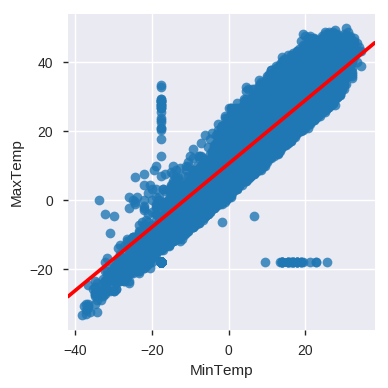

In [0]:
plt.figure(figsize=(5,5))
sns.pairplot(data_mod, x_vars='MinTemp', y_vars='MaxTemp', size=4, markers = 'o',
             kind='reg', plot_kws={'line_kws':{'color':'red'}})

<a id=section34></a>
### 3.4 Post Processing Profiling

In [0]:
data_mod_profile = pp.ProfileReport(data_mod)
data_profile.to_file(outputfile="weather_data_after_preprocessing.html")
pp.ProfileReport(data_mod)

Number of variables,8
Number of observations,119030
Total Missing (%),0.0%
Total size in memory,7.3 MiB
Average record size in memory,64.0 B
Numeric,8
Categorical,0
Boolean,0
Date,0
Text (Unique),0
Rejected,0


In [0]:
data_mod1 = data_mod

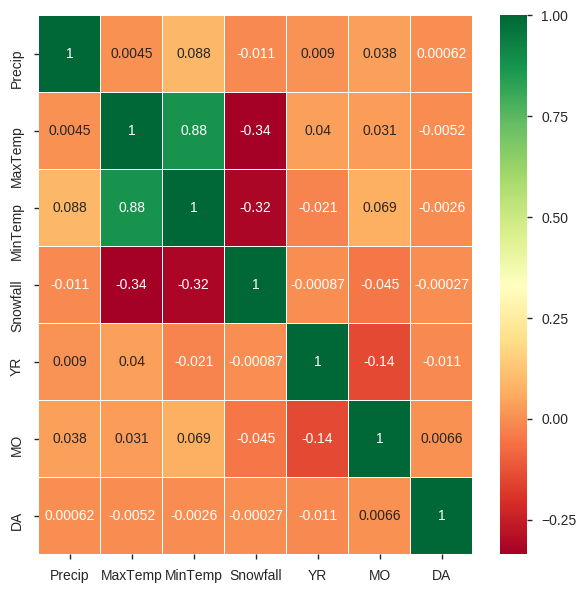

In [0]:
plt.figure(figsize=(7,7))
sns.heatmap(data_mod1.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
plt.show()

### Interpreting The Heatmap

The first thing to note is that only the numeric features are compared as it is obvious that we cannot correlate between alphabets or strings. Before understanding the plot, let us see what exactly correlation is.

**POSITIVE CORRELATION:** If an **increase in feature A leads to increase in feature B, then they are positively correlated**. A value **1 means perfect positive correlation**.

**NEGATIVE CORRELATION:** If an **increase in feature A leads to decrease in feature B, then they are negatively correlated**. A value **-1 means perfect negative correlation**.

Now lets say that two features are highly or perfectly correlated, so the increase in one leads to increase in the other. This means that both the features are containing highly similar information and there is very little or no variance in information. This is known as **MultiColinearity** as both of them contains almost the same information.

In [0]:
data_mod1['Precip']=data_mod1['Precip'].apply(lambda x:round(x,2))
data_mod1['MaxTemp']=data_mod1['MaxTemp'].apply(lambda x:round(x,2))
data_mod1['MinTemp']=data_mod1['MinTemp'].apply(lambda x:round(x,2))
data_mod1['MeanTemp']=data_mod1['MinTemp'].apply(lambda x:round(x,2))
data_mod1['Snowfall']=data_mod1['Snowfall'].apply(lambda x:round(x,2))

In [0]:
data_mod1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119030 entries, 0 to 119039
Data columns (total 8 columns):
Precip      119030 non-null float64
MaxTemp     119030 non-null float64
MinTemp     119030 non-null float64
Snowfall    117867 non-null float64
YR          119030 non-null int64
MO          119030 non-null int64
DA          119030 non-null int64
MeanTemp    119030 non-null float64
dtypes: float64(5), int64(3)
memory usage: 8.2 MB


<a id=section4></a>
## 4. Predictive Modeling

EDA helped us understand the data. But to predict the Maximum temperature, we wpuld need a Regression Algorithm. We will use the __Linear Regression__ to make the model. We will follow the below steps,

To apply any machine learning algorithm on your dataset, basically there are 4 steps:

1. Load the algorithm
2. Instantiate and Fit the model to the training dataset
3. Prediction on the test set
4. Calculating Root mean square error

In [0]:
feature_cols = ['MinTemp']                # create a Python list of feature names
X = data_mod1[feature_cols].values                                     # use the list to select a subset of the original DataFrame-+

y = data_mod1.MaxTemp.values

In [0]:
from sklearn.model_selection import train_test_split

def split(X,y):
    return train_test_split(X, y, test_size=0.25, random_state=1)

In [0]:
X_train, X_test, y_train, y_test=split(X,y)
print('Train cases as below')
print('X_train shape: ',X_train.shape)
print('y_train shape: ',y_train.shape)
print('\nTest cases as below')
print('X_test shape: ',X_test.shape)
print('y_test shape: ',y_test.shape)

Train cases as below
('X_train shape: ', (89272, 1))
('y_train shape: ', (89272,))

Test cases as below
('X_test shape: ', (29758, 1))
('y_test shape: ', (29758,))


In [0]:
def linear_reg( X, y, gridsearch = False):
    
    X_train, X_test, y_train, y_test = split(X,y)
    
    from sklearn.linear_model import LinearRegression
    linreg = LinearRegression()
    
    if not(gridsearch):
        linreg.fit(X_train, y_train)
        y_pred_test = linreg.predict(X_test)                               # make predictions on the testing set
        y_pred_train = linreg.predict(X_train)   

        RMSE_train = np.sqrt( metrics.mean_squared_error(y_train, y_pred_train))
        RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))

        print('RMSE for training set is {}'.format(RMSE_train))
        print('RMSE for test set is {}'.format(RMSE_test))
        
        MAE_train = metrics.mean_absolute_error(y_train, y_pred_train)
        MAE_test = metrics.mean_absolute_error(y_test, y_pred_test)

        print('MAE for training set is {}'.format(MAE_train))  
        print('MAE for test set is {}'.format(MAE_test))

        MSE_train = metrics.mean_squared_error(y_train, y_pred_train)
        MSE_test = metrics.mean_squared_error(y_test, y_pred_test)

        print('MSE for training set is {}'.format(MSE_train))
        print('MSE for test set is {}'.format(MSE_test))

    else:
        from sklearn.model_selection import GridSearchCV
        parameters = {'normalize':[True,False], 'copy_X':[True, False]}
        linreg = GridSearchCV(linreg,parameters, cv=5, refit = True)
        linreg.fit(X_train, y_train)                         # fit the model to the training data (learn the coefficients)
        print("Mean cross-validated score of the best_estimator : ", linreg.best_score_)  
        
        y_pred_test = linreg.predict(X_test)                               # make predictions on the testing set
        y_pred_train = linreg.predict(X_train)

        RMSE_train = np.sqrt( metrics.mean_squared_error(y_train, y_pred_train))
        RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))

        print('RMSE for training set is {}'.format(RMSE_train))
        print('RMSE for test set is {}'.format(RMSE_test))

        MAE_train = metrics.mean_absolute_error(y_train, y_pred_train)
        MAE_test = metrics.mean_absolute_error(y_test, y_pred_test)

        print('MAE for training set is {}'.format(MAE_train))  
        print('MAE for test set is {}'.format(MAE_test))

        MSE_train = metrics.mean_squared_error(y_train, y_pred_train)
        MSE_test = metrics.mean_squared_error(y_test, y_pred_test)

        print('MSE for training set is {}'.format(MSE_train))
        print('MSE for test set is {}'.format(MSE_test))

    return linreg

<a id=section41></a>
### 4.1 Linear Regression model without GridSearchCV

In [0]:
X = data_mod1[feature_cols]  
y = data_mod1.MaxTemp
linreg = linear_reg(X,y)
slope1 = linreg.coef_  
intercept1 = linreg.intercept_
print('Intercept:',linreg.intercept_) 
print('Coefficients:',linreg.coef_)

RMSE for training set is 4.16590620012
RMSE for test set is 4.16779646464
MAE for training set is 3.18649195094
MAE for test set is 3.17743368627
MSE for training set is 17.3547744682
MSE for test set is 17.3705273707
('Intercept:', 10.659529591705233)
('Coefficients:', array([0.9212793]))


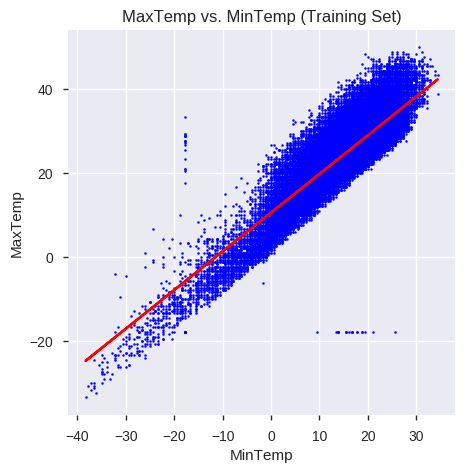

In [0]:
plt.figure(figsize=(5,5))
plt.scatter(X_train, y_train, color='blue', s=2)
plt.plot(X_train, linreg.predict(X_train), color='red')
plt.title('MaxTemp vs. MinTemp (Training Set)')
plt.xlabel('MinTemp')
plt.ylabel('MaxTemp')
plt.show()

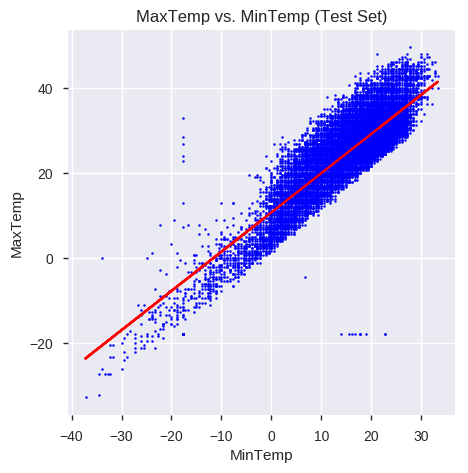

In [0]:
plt.figure(figsize=(5,5))
plt.scatter(X_test, y_test, color='blue', s = 2)
plt.plot(X_test, linreg.predict(X_test), color='red')
plt.title('MaxTemp vs. MinTemp (Test Set)')
plt.xlabel('MinTemp')
plt.ylabel('MaxTemp')
plt.show()

<a id=section42></a>
### 4.2 Linear Regression model with GridSearchCV

In [0]:
X = data_mod1[feature_cols]  
y = data_mod1.MaxTemp
linreg = linear_reg(X,y,True)

print('Intercept:',linreg.best_estimator_.intercept_)          # print the intercept 
print('Coefficients:',linreg.best_estimator_.coef_) 
intercept2 = linreg.best_estimator_.intercept_
slope2 = linreg.best_estimator_.coef_

('Mean cross-validated score of the best_estimator : ', 0.7739447525199433)
RMSE for training set is 4.16590620012
RMSE for test set is 4.16779646464
MAE for training set is 3.18649195094
MAE for test set is 3.17743368627
MSE for training set is 17.3547744682
MSE for test set is 17.3705273707
('Intercept:', 10.659529591705237)
('Coefficients:', array([0.9212793]))


In [0]:
yhat = linreg.predict(X_train)
SS_Residual = sum((y_train-yhat)**2)
SS_Total = sum((y_train-np.mean(y_train))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
print(r_squared, adjusted_r_squared)

(0.7740000743557337, 0.7739975427109971)


In [0]:
yhat = linreg.predict(X_test)
SS_Residual = sum((y_test-yhat)**2)
SS_Total = sum((y_test-np.mean(y_test))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print(r_squared, adjusted_r_squared)

(0.7640893959408965, 0.7640814677716514)


In [0]:
X_List = data_mod1['MinTemp'].tolist()
#X=data_mod1.MinTemp.values.reshape(-1,1)
X_List_Len = len(X_List)
y_List = data_mod1['MaxTemp'].tolist()
#num = np.random.randint(1,10)
num = 10
print("******** Results (" + str(num) + " occurrence/s *******)")
for i in range(num):
    y_cal1 = (intercept1 + (slope1 * X_List[i]))
    y_cal2 = (intercept2 + (slope2 * X_List[i]))
    print("Min Temp Actual:", X_List[i], "Max Temp Actual:", y_List[i],"Max Temp Calculated (no GridSearchCV):", y_cal1)
    print("Min Temp Actual:", X_List[i], "Max Temp Actual:", y_List[i],"Max Temp Calculated (with GridSearchCV):", y_cal2)
    print("")

******** Results (10 occurrence/s *******)
('Min Temp Actual:', 22.22, 'Max Temp Actual:', 25.56, 'Max Temp Calculated (no GridSearchCV):', array([31.13035573]))
('Min Temp Actual:', 22.22, 'Max Temp Actual:', 25.56, 'Max Temp Calculated (with GridSearchCV):', array([31.13035573]))

('Min Temp Actual:', 21.67, 'Max Temp Actual:', 28.89, 'Max Temp Calculated (no GridSearchCV):', array([30.62365212]))
('Min Temp Actual:', 21.67, 'Max Temp Actual:', 28.89, 'Max Temp Calculated (with GridSearchCV):', array([30.62365212]))

('Min Temp Actual:', 22.22, 'Max Temp Actual:', 26.11, 'Max Temp Calculated (no GridSearchCV):', array([31.13035573]))
('Min Temp Actual:', 22.22, 'Max Temp Actual:', 26.11, 'Max Temp Calculated (with GridSearchCV):', array([31.13035573]))

('Min Temp Actual:', 22.22, 'Max Temp Actual:', 26.67, 'Max Temp Calculated (no GridSearchCV):', array([31.13035573]))
('Min Temp Actual:', 22.22, 'Max Temp Actual:', 26.67, 'Max Temp Calculated (with GridSearchCV):', array([31.130355

<a id=section5></a>
## 5. Conclusion

1. The dataset had several columns with Null values.
2. The dataset has multiple duplicate columns with same data and different units.
3. We used linear regression to build a model to predict the __Maximum Temperature__.
4. Maximum Temperature has the highest co-relation with the __Minimum & Mean Temperature__.
5. The model came up with a RMSE of __4.16779646464__ for test data and RMSE of __4.16590620012__ for training data.
6. The model has a __R_Squared__ score of __0.7640893959408965__ and an __Adjusted_R_Squared__ score of __0.7640814677716514__.
7. The dataset does not have enough parameters to build a linear regression model with higher accuracy.